In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv(r"/Users/niketanbaranwal/Downloads/NBA_Team_Stats.csv")

In [66]:
df

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,...,Oreb,Fgm-a,Pct,3gm-a,Pct.1,Ftm-a,Pct.2,Eff,Deff,Year
0,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,...,14.9,36.7-81.7,0.449,3.9-12.0,0.323,18.7-25.2,0.741,111.6,17.5,1997-1998
1,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,...,11.3,35.9-74.3,0.483,3.1-8.4,0.368,23.8-30.9,0.768,116.3,17.5,1997-1998
2,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,...,12.1,38.2-82.0,0.466,5.2-14.7,0.355,17.7-23.6,0.747,117.1,13.6,1997-1998
3,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,...,13.2,38.0-79.1,0.480,6.1-17.3,0.350,22.8-33.7,0.675,120.8,13.2,1997-1998
4,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,...,11.9,35.1-75.1,0.468,3.7-10.8,0.344,18.5-26.8,0.688,108.0,13.1,1997-1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
720,25,Sacramento,82,48.3,110.3,42.9,23.7,7.2,4.5,13.5,...,9.6,40.5-88.1,0.460,11.4-33.2,0.344,17.9-23.3,0.768,122.1,-13.4,2021-2022
721,26,Orlando,82,48.2,104.2,44.3,23.7,6.8,4.5,13.8,...,9.1,38.3-88.3,0.434,12.2-36.8,0.331,15.5-19.7,0.787,115.5,-16.0,2021-2022
722,27,Detroit,82,48.2,104.8,43.0,23.5,7.7,4.8,13.4,...,11.0,38.2-88.6,0.430,11.3-34.6,0.326,17.2-22.0,0.782,115.1,-16.7,2021-2022
723,28,Portland,82,48.1,106.2,42.9,22.9,8.0,4.5,13.7,...,10.4,38.5-87.1,0.443,12.7-36.8,0.346,16.4-21.6,0.760,117.1,-19.0,2021-2022


In [4]:
#Indexing by Year 
df2 = df.set_index('Year')
df2

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,...,Dreb,Oreb,Fgm-a,Pct,3gm-a,Pct.1,Ftm-a,Pct.2,Eff,Deff
Year,,,,,,,,,,,,,,,,,,,,,
1997-1998,1,Chicago,103,48.4,96.0,44.1,23.1,8.6,4.3,13.0,...,29.2,14.9,36.7-81.7,0.449,3.9-12.0,0.323,18.7-25.2,0.741,111.6,17.5
1997-1998,2,Utah,102,48.3,98.6,40.8,24.7,7.6,4.8,14.7,...,29.5,11.3,35.9-74.3,0.483,3.1-8.4,0.368,23.8-30.9,0.768,116.3,17.5
1997-1998,3,Phoenix,86,48.6,99.3,41.9,25.6,9.2,5.3,14.4,...,29.8,12.1,38.2-82.0,0.466,5.2-14.7,0.355,17.7-23.6,0.747,117.1,13.6
1997-1998,4,L.A.Lakers,95,48.3,104.8,42.9,24.3,8.7,6.8,14.7,...,29.7,13.2,38.0-79.1,0.480,6.1-17.3,0.350,22.8-33.7,0.675,120.8,13.2
1997-1998,5,San Antonio,91,48.4,92.5,44.1,21.9,6.2,6.9,15.3,...,32.2,11.9,35.1-75.1,0.468,3.7-10.8,0.344,18.5-26.8,0.688,108.0,13.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-2022,25,Sacramento,82,48.3,110.3,42.9,23.7,7.2,4.5,13.5,...,33.4,9.6,40.5-88.1,0.460,11.4-33.2,0.344,17.9-23.3,0.768,122.1,-13.4
2021-2022,26,Orlando,82,48.2,104.2,44.3,23.7,6.8,4.5,13.8,...,35.2,9.1,38.3-88.3,0.434,12.2-36.8,0.331,15.5-19.7,0.787,115.5,-16.0
2021-2022,27,Detroit,82,48.2,104.8,43.0,23.5,7.7,4.8,13.4,...,32.0,11.0,38.2-88.6,0.430,11.3-34.6,0.326,17.2-22.0,0.782,115.1,-16.7


In [5]:
#Filtering the data as we want to compare average assists per team to efficency 
df2.filter(items = ['Team','Ast', 'Eff'], axis = 1)

,Team,Ast,Eff
Year,,,
1997-1998,Chicago,23.1,111.6
1997-1998,Utah,24.7,116.3
1997-1998,Phoenix,25.6,117.1
1997-1998,L.A.Lakers,24.3,120.8
1997-1998,San Antonio,21.9,108.0
...,...,...,...
2021-2022,Sacramento,23.7,122.1
2021-2022,Orlando,23.7,115.5
2021-2022,Detroit,23.5,115.1


In [6]:
df3 = df.set_index('Year')
df3.sort_values(by = 'Ast', ascending = False)
#2016-2017 Warriors averaged the most assist since the 1997-1998 season

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,...,Dreb,Oreb,Fgm-a,Pct,3gm-a,Pct.1,Ftm-a,Pct.2,Eff,Deff
Year,,,,,,,,,,,,,,,,,,,,,
2016-2017,1,Golden State,99,48.2,116.5,44.7,30.0,9.4,6.7,14.3,...,35.3,9.4,43.1-87.1,0.494,12.1-31.5,0.384,18.3-23.1,0.793,144.2,32.1
2018-2019,2,Golden State,104,48.3,116.9,45.6,29.2,7.5,6.3,13.9,...,35.8,9.8,43.4-89.0,0.488,13.0-34.1,0.382,17.1-21.2,0.804,142.0,20.5
2017-2018,1,Golden State,103,48.1,112.8,43.8,28.6,8.0,7.1,14.5,...,35.2,8.6,42.5-85.3,0.498,11.3-29.4,0.383,16.6-20.3,0.817,139.4,24.2
2021-2022,16,Charlotte,83,48.5,115.2,44.6,28.0,8.5,4.9,12.7,...,33.7,10.9,42.7-91.4,0.467,13.9-38.2,0.365,15.9-21.5,0.741,134.2,1.0
2015-2016,2,Golden State,106,48.4,113.3,45.5,27.9,8.3,5.9,14.6,...,35.4,10.1,41.7-86.9,0.480,13.0-31.8,0.410,16.8-22.2,0.756,135.7,23.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-2005,13,Seattle,93,48.2,98.9,40.8,17.9,6.7,4.2,12.7,...,28.1,12.7,35.2-79.0,0.445,7.7-21.5,0.360,20.8-26.3,0.791,106.4,1.7
2008-2009,26,Memphis,82,48.3,93.9,38.8,17.4,7.5,4.7,14.2,...,28.5,10.3,34.9-77.0,0.454,4.9-13.5,0.360,19.1-25.3,0.756,99.8,-13.1
2005-2006,4,Dallas,105,20.0,99.3,42.3,17.4,7.1,5.6,12.7,...,29.8,12.5,36.0-78.3,0.460,5.0-13.9,0.360,22.3-28.3,0.789,110.7,12.7


In [7]:
df4 = df.set_index('Year')
df4.sort_values(by = 'Eff', ascending = False)
#2016-2017 Warriors were the most efficient team since the 1997-1998 season

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,...,Dreb,Oreb,Fgm-a,Pct,3gm-a,Pct.1,Ftm-a,Pct.2,Eff,Deff
Year,,,,,,,,,,,,,,,,,,,,,
2016-2017,1,Golden State,99,48.2,116.5,44.7,30.0,9.4,6.7,14.3,...,35.3,9.4,43.1-87.1,0.494,12.1-31.5,0.384,18.3-23.1,0.793,144.2,32.1
2018-2019,2,Golden State,104,48.3,116.9,45.6,29.2,7.5,6.3,13.9,...,35.8,9.8,43.4-89.0,0.488,13.0-34.1,0.382,17.1-21.2,0.804,142.0,20.5
2018-2019,1,Milwaukee,97,48.3,117.3,50.1,25.9,7.3,6.0,13.1,...,40.7,9.4,42.8-90.7,0.472,13.4-38.2,0.350,18.3-24.0,0.765,140.0,21.5
2017-2018,1,Golden State,103,48.1,112.8,43.8,28.6,8.0,7.1,14.5,...,35.2,8.6,42.5-85.3,0.498,11.3-29.4,0.383,16.6-20.3,0.817,139.4,24.2
2019-2020,1,Milwaukee,83,48.2,117.8,51.1,25.7,7.2,5.7,14.6,...,41.7,9.5,42.9-90.5,0.474,13.7-38.7,0.355,18.2-24.6,0.741,138.9,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-1999,29,L.A.Clippers,50,48.5,90.4,39.2,16.4,8.5,4.7,15.2,...,25.9,13.3,34.2-80.1,0.427,4.3-13.4,0.320,17.7-24.5,0.721,91.2,-24.0
2002-2003,28,Denver,82,48.1,84.2,42.4,21.2,8.7,5.2,17.4,...,28.8,13.6,32.8-79.8,0.411,2.8-10.0,0.278,15.8-22.6,0.699,90.4,-14.9
1998-1999,15,Atlanta,59,48.3,85.3,42.8,15.4,7.1,5.0,14.0,...,29.5,13.3,30.4-75.1,0.405,4.1-13.3,0.307,20.3-27.6,0.736,89.6,0.7


In [8]:
df5 = df.set_index('Year')
df5.sort_values(by = 'Ast', ascending = True)
#1998-1999 Atlanta Hawks averaged the least assists since the 1997-1998 NBA season

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,...,Dreb,Oreb,Fgm-a,Pct,3gm-a,Pct.1,Ftm-a,Pct.2,Eff,Deff
Year,,,,,,,,,,,,,,,,,,,,,
1998-1999,15,Atlanta,59,48.3,85.3,42.8,15.4,7.1,5.0,14.0,...,29.5,13.3,30.4-75.1,0.405,4.1-13.3,0.307,20.3-27.6,0.736,89.6,0.7
1998-1999,29,L.A.Clippers,50,48.5,90.4,39.2,16.4,8.5,4.7,15.2,...,25.9,13.3,34.2-80.1,0.427,4.3-13.4,0.320,17.7-24.5,0.721,91.2,-24.0
2005-2006,4,Dallas,105,20.0,99.3,42.3,17.4,7.1,5.6,12.7,...,29.8,12.5,36.0-78.3,0.460,5.0-13.9,0.360,22.3-28.3,0.789,110.7,12.7
2008-2009,26,Memphis,82,48.3,93.9,38.8,17.4,7.5,4.7,14.2,...,28.5,10.3,34.9-77.0,0.454,4.9-13.5,0.360,19.1-25.3,0.756,99.8,-13.1
2005-2006,29,New York,82,20.0,95.6,41.4,17.9,6.8,3.3,17.0,...,28.8,12.6,34.4-75.7,0.455,3.9-10.8,0.362,22.9-31.5,0.726,98.1,-15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-2016,2,Golden State,106,48.4,113.3,45.5,27.9,8.3,5.9,14.6,...,35.4,10.1,41.7-86.9,0.480,13.0-31.8,0.410,16.8-22.2,0.756,135.7,23.3
2021-2022,16,Charlotte,83,48.5,115.2,44.6,28.0,8.5,4.9,12.7,...,33.7,10.9,42.7-91.4,0.467,13.9-38.2,0.365,15.9-21.5,0.741,134.2,1.0
2017-2018,1,Golden State,103,48.1,112.8,43.8,28.6,8.0,7.1,14.5,...,35.2,8.6,42.5-85.3,0.498,11.3-29.4,0.383,16.6-20.3,0.817,139.4,24.2


In [9]:
df6 = df.set_index('Year')
df6.sort_values(by = 'Eff', ascending = True)
#1998-1999 Chicago Bulls were the least efficient since the 1997-1998 season
#1998-1999 Atlanta Hawks were the third least efficient since the 1997-1998 season

,No,Team,G,Min,Pts,Reb,Ast,Stl,Blk,To,...,Dreb,Oreb,Fgm-a,Pct,3gm-a,Pct.1,Ftm-a,Pct.2,Eff,Deff
Year,,,,,,,,,,,,,,,,,,,,,
1998-1999,27,Chicago,50,48.3,81.9,39.3,20.3,8.7,3.4,14.6,...,27.9,11.5,30.8-76.7,0.401,3.5-12.2,0.289,16.8-23.7,0.709,86.2,-21.1
1999-2000,28,Chicago,82,48.3,84.8,40.9,20.0,7.9,4.7,17.5,...,28.3,12.6,31.3-75.4,0.415,4.1-12.6,0.329,18.1-25.5,0.709,89.3,-22.2
1998-1999,15,Atlanta,59,48.3,85.3,42.8,15.4,7.1,5.0,14.0,...,29.5,13.3,30.4-75.1,0.405,4.1-13.3,0.307,20.3-27.6,0.736,89.6,0.7
2002-2003,28,Denver,82,48.1,84.2,42.4,21.2,8.7,5.2,17.4,...,28.8,13.6,32.8-79.8,0.411,2.8-10.0,0.278,15.8-22.6,0.699,90.4,-14.9
1998-1999,29,L.A.Clippers,50,48.5,90.4,39.2,16.4,8.5,4.7,15.2,...,25.9,13.3,34.2-80.1,0.427,4.3-13.4,0.320,17.7-24.5,0.721,91.2,-24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-2020,1,Milwaukee,83,48.2,117.8,51.1,25.7,7.2,5.7,14.6,...,41.7,9.5,42.9-90.5,0.474,13.7-38.7,0.355,18.2-24.6,0.741,138.9,21.0
2017-2018,1,Golden State,103,48.1,112.8,43.8,28.6,8.0,7.1,14.5,...,35.2,8.6,42.5-85.3,0.498,11.3-29.4,0.383,16.6-20.3,0.817,139.4,24.2
2018-2019,1,Milwaukee,97,48.3,117.3,50.1,25.9,7.3,6.0,13.1,...,40.7,9.4,42.8-90.7,0.472,13.4-38.2,0.350,18.3-24.0,0.765,140.0,21.5


In [10]:
#Average Assists
ast_mean = df[["Ast"]].mean()
ast_mean

Ast    22.051724
dtype: float64

In [11]:
#Average Efficiency
eff_mean = df[["Eff"]].mean()
eff_mean

Eff    112.577793
dtype: float64

In [12]:
#Convert the Assist column into a series 
ser_ast = df['Ast'].squeeze()
ser_ast = df['Ast']
print(ser_ast)

0      23.1
1      24.7
2      25.6
3      24.3
4      21.9
       ... 
720    23.7
721    23.7
722    23.5
723    22.9
724    22.2
Name: Ast, Length: 725, dtype: float64


In [13]:
print(type(ser_ast))

<class 'pandas.core.series.Series'>


In [14]:
#Convert the Efficiency column into a series 
ser_eff = df['Eff'].squeeze()
ser_eff = df['Eff']
print(ser_eff)

0      111.6
1      116.3
2      117.1
3      120.8
4      108.0
       ...  
720    122.1
721    115.5
722    115.1
723    117.1
724    114.8
Name: Eff, Length: 725, dtype: float64


In [15]:
print(type(ser_eff))

<class 'pandas.core.series.Series'>


In [29]:
#Pearson's R
#r-value > .7 meaning there is a good positive correlation between assist and efficiency
r = pearsonr(ser_ast,ser_eff)

In [33]:
round(r,2)

0.76

In [37]:
#Spearman's rho
corr = spearmanr(ser_ast,ser_eff)

In [38]:
corr

SignificanceResult(statistic=0.7275472738226098, pvalue=1.9884082451279888e-120)

In [40]:
#Kendall's Tau
p = kendalltau(ser_ast,ser_eff)

In [41]:
p

SignificanceResult(statistic=0.5423976370340711, pvalue=3.75638152511012e-104)

Text(0, 0.5, 'Efficiency')

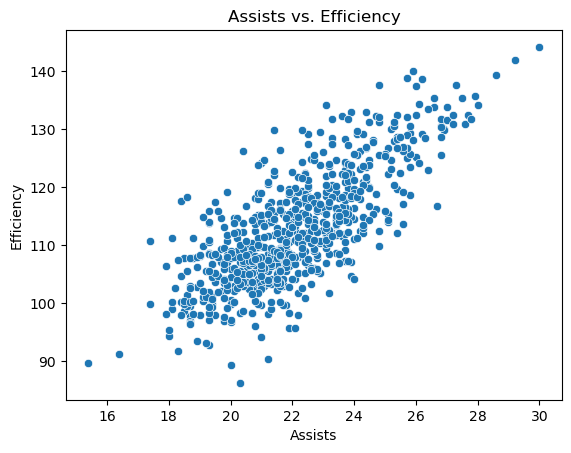

In [20]:
#Create a scatterplot for Ast vs. Eff to see correlation
#Looks like a positive correlation without line of best fit 
ax = sns.scatterplot(x="Ast", y="Eff", data= df);
ax.set_title("Assists vs. Efficiency")
ax.set_xlabel("Assists")
ax.set_ylabel("Efficiency")

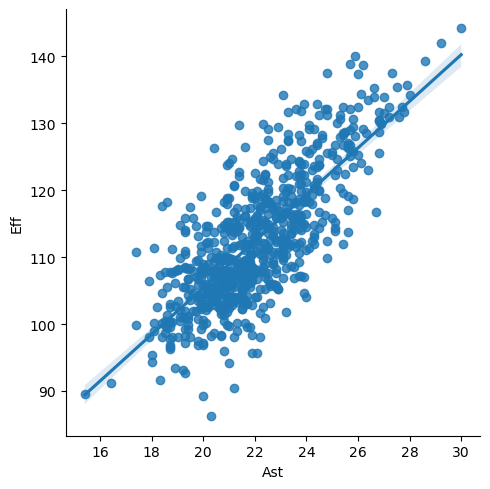

In [21]:
#Create line of best fit 
#Positive Correlation as the slope is positive 
sns.lmplot(x="Ast", y="Eff", data=df)

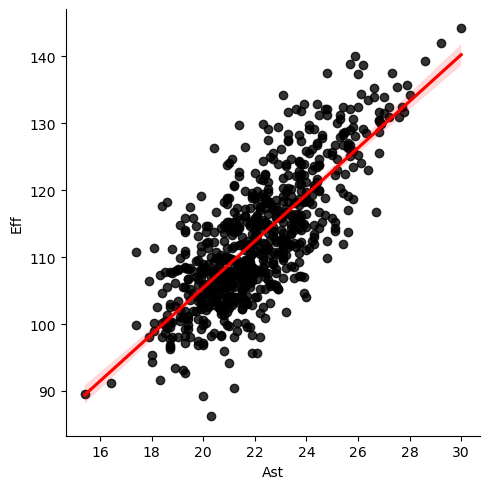

In [22]:
#Customize plot so that you can differentiate line from data point 
sns.lmplot(x="Ast", y="Eff", data=df, scatter_kws={"color": "black"}, line_kws={"color": "red"});

In [49]:
data = df[['Ast', 'Eff']]

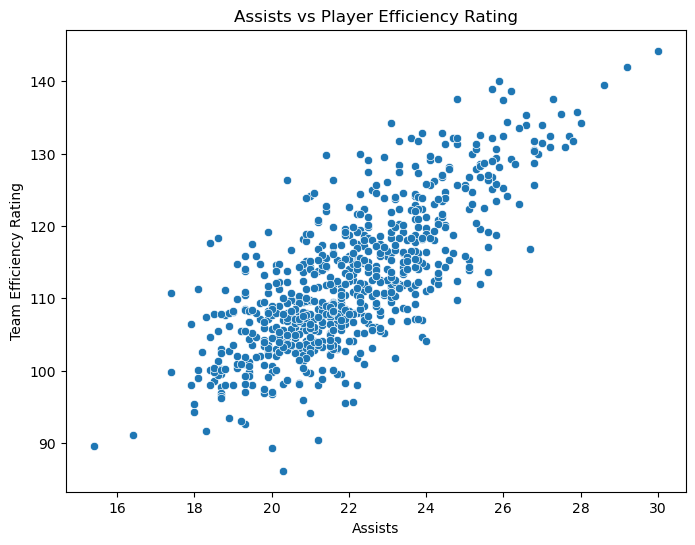

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Ast'], y=data['Eff'])
plt.title('Assists vs Player Efficiency Rating')
plt.xlabel('Assists')
plt.ylabel('Team Efficiency Rating')
plt.show()

In [51]:
X = data[['Ast']]  # Independent variable
y = data['Eff']  # Dependent variable

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the dependent variable for the test set
y_pred = model.predict(X_test)

In [56]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²) to understand the proportion of variance explained by the model
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 37.498706174240866
R-squared: 0.589773487724494


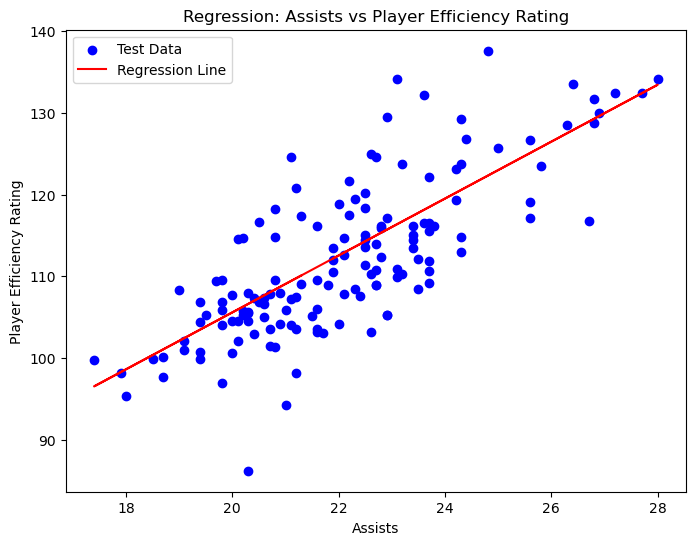

In [60]:
#Visualize regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('Regression: Assists vs Player Efficiency Rating')
plt.xlabel('Assists')
plt.ylabel('Player Efficiency Rating')
plt.legend()
plt.show()

In [58]:
# View the model's coefficients (slope) and intercept
print(f'Coefficient (slope): {model.coef_}')
print(f'Intercept: {model.intercept_}')

Coefficient (slope): [3.48283832]
Intercept: 35.920371153605274
